In [1]:
# Car price prediction kaggle project : 
import sys
print(sys.path)

['/Users/rohitgupta/Documents/ml_projects/car_price_prediction', '/opt/miniconda3/envs/carpriceprediction/lib/python38.zip', '/opt/miniconda3/envs/carpriceprediction/lib/python3.8', '/opt/miniconda3/envs/carpriceprediction/lib/python3.8/lib-dynload', '', '/opt/miniconda3/envs/carpriceprediction/lib/python3.8/site-packages', '/opt/miniconda3/envs/carpriceprediction/lib/python3.8/site-packages/IPython/extensions', '/Users/rohitgupta/.ipython']


In [2]:
#!pip3 install pandas 
import pandas as pd

In [3]:
import pandas as pd
data = pd.read_csv("car_data.csv")

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.shape

(301, 9)

In [6]:
print(data['Seller_Type'].unique())

['Dealer' 'Individual']


In [7]:
print(data['Transmission'].unique())

['Manual' 'Automatic']


In [8]:
print(data['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [9]:
print(data['Owner'].unique())

[0 1 3]


In [10]:
# perform one hot encoding of the data : 

In [11]:
# current year: 2021 - how many years old is each car - that should also factor into the selling price prediction. 
data['current_year'] = 2021

In [12]:
data.shape

(301, 10)

In [13]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [14]:
#Now get a column indicating how old the car is : 
data['years_old'] = data['current_year'] - data['Year'] 

In [15]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,years_old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [22]:
# We must build a machine learning model that predicts the selling price of the car based on the present price, as well
# as the variety of the features that are present in the data. We need to determine which features are relevant
# to the process and then build the relevant model. 

# years_old, present_price,kms_driven, owner.

# check if there are any null values for each corresponding column: 
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
current_year     0
years_old        0
dtype: int64

In [25]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'current_year',
       'years_old'],
      dtype='object')

In [24]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,current_year,years_old
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.0,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,2021.0,7.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,0.0,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,2021.0,3.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,2021.0,5.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,2021.0,7.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,2021.0,9.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,2021.0,18.000000


In [28]:
final_data = data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'current_year','years_old']]
     

In [30]:
final_data.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4


In [32]:
# Feature Selection : 
# drop certain features 
final_data.drop(['Year'],axis=1,inplace=True)
final_data.head(5)

/opt/miniconda3/envs/carpriceprediction/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [ ]:
final_data.drop(['current_year'],axis=1,inplace=True)
final_data.head(5)

In [34]:
# one hot encoding of some of the features using getdummy: 

final_data = pd.get_dummies(final_data,drop_first=True)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [35]:
# Finding correlation : 
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
years_old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [43]:
!pip3 install seaborn
import seaborn as sns

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


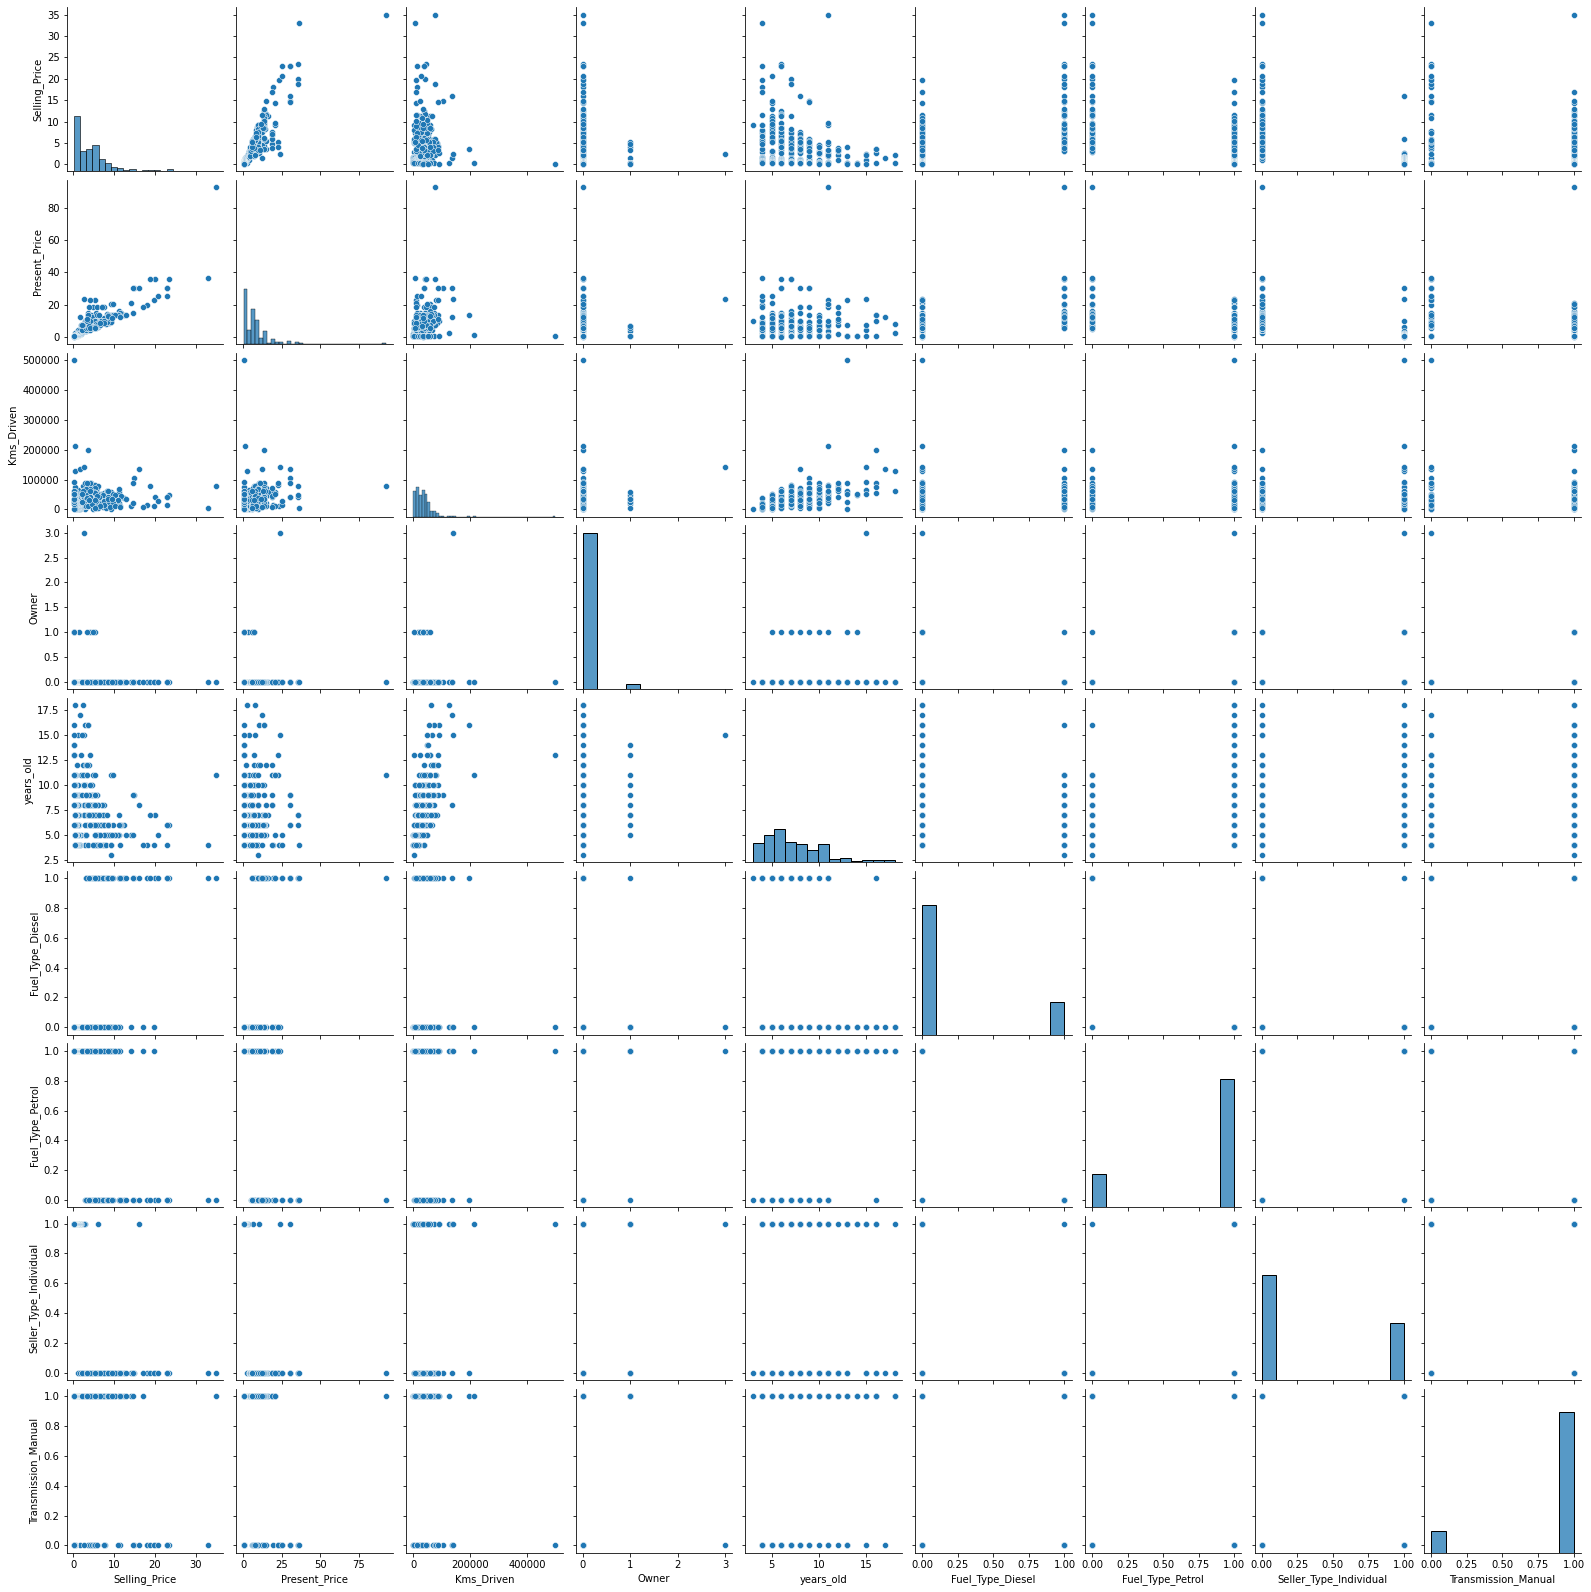

In [44]:
import seaborn as sns
sns.pairplot(final_data)

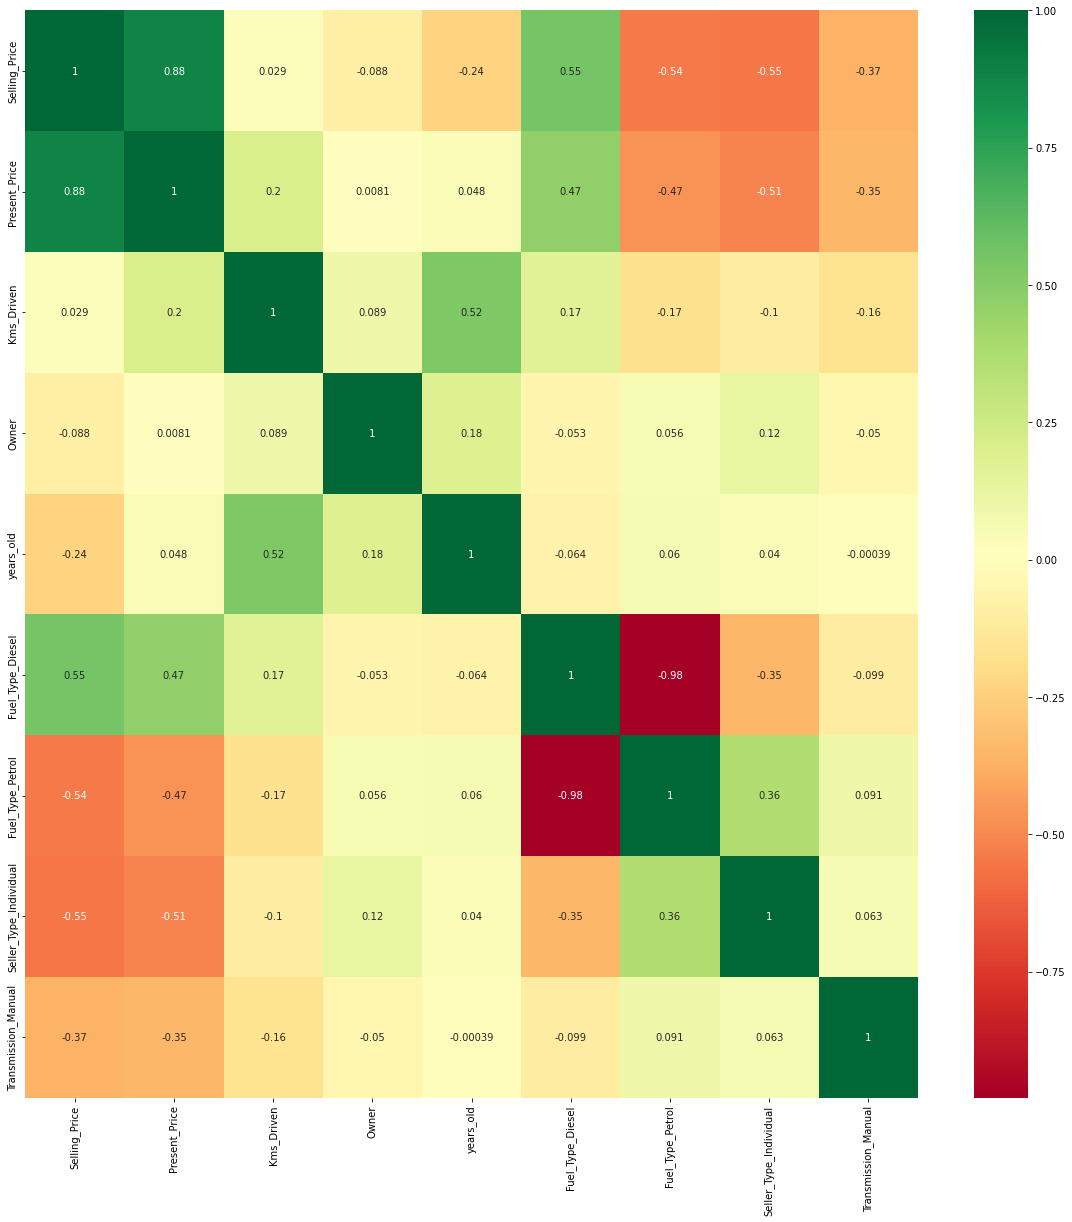

In [52]:
# create a heatmap : 
import matplotlib.pyplot as plt
%matplotlib inline

corrmat=final_data.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 

#plot heat map 
g=sns.heatmap(final_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [53]:
# Define X and Y - training - test datasets for prediction : 
# defining independent and dependent features for model building. 

X = final_data.iloc[:,1:]
Y = final_data.iloc[:,0]

In [54]:
X.head(3)

,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1


In [55]:
Y.head(3)

0    3.35
1    4.75
2    7.25
Name: Selling_Price, dtype: float64

In [57]:
# feature importance : 

from sklearn.ensemble import ExtraTreesRegressor 

extraTR = ExtraTreesRegressor()
extraTR.fit(X,Y)

ExtraTreesRegressor()

In [59]:
extraTR.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
print(extraTR.feature_importances_)

[0.38803571 0.03869667 0.00082795 0.07943127 0.21524954 0.02043851
 0.12781355 0.1295068 ]


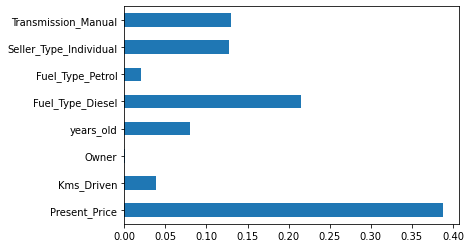

In [61]:
# understanding which features are important via visualization : 

feat_importances = pd.Series(extraTR.feature_importances_,index=X.columns)

feat_importances.plot(kind='barh')

plt.show()

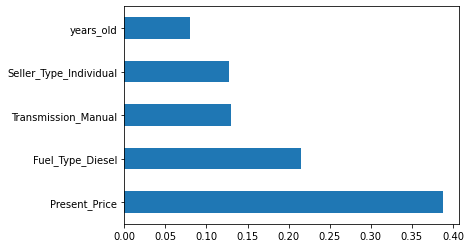

In [62]:
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [64]:
X_train.shape

(240, 8)

In [65]:
X_test.shape

(61, 8)

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [67]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [68]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [69]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [71]:
# Random search of parameters, using 3 fold cross validation, 
from sklearn.model_selection import RandomizedSearchCV
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [72]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
predictions = rf_random.predict(X_test)

In [74]:
predictions

array([ 2.30164408,  0.86529708,  0.4340605 ,  2.92701443,  5.53873698,
        1.2188408 ,  3.95370668,  7.36013796, 10.40287635,  4.84880549,
        1.22667474,  0.56724602, 19.56026775,  3.43798046,  0.41351751,
       10.57286056,  2.90285714,  0.69969285,  4.34265555,  5.84524667,
        4.269192  ,  1.23192034,  1.86098318,  2.91876735,  0.4931894 ,
        1.22504617,  0.46502275,  8.84139113,  1.21721223,  2.64440789,
        4.38432759,  5.0981132 ,  8.92167974,  6.45620079,  4.27715366,
        2.85812738,  0.28899767,  1.21721223,  1.21721223,  4.57399375,
        5.29671775,  1.22017116,  0.32525301,  0.22728702,  4.9447379 ,
        3.76861575,  3.93864371,  0.41160289,  8.14347532,  5.55902723,
       14.80309776,  4.84504812,  0.50578901,  0.58057169,  4.46920032,
        1.21721223,  0.63226236,  7.50015393,  0.40647861,  5.46727926,
        0.31836158])

/opt/miniconda3/envs/carpriceprediction/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

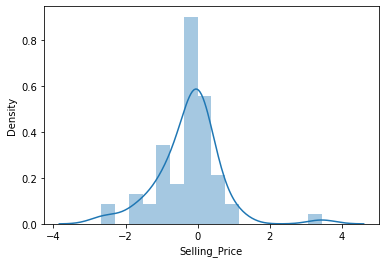

In [79]:
sns.distplot(Y_test-predictions)
# Gaussian distribution indicates that the values follow the property of that distribution.  

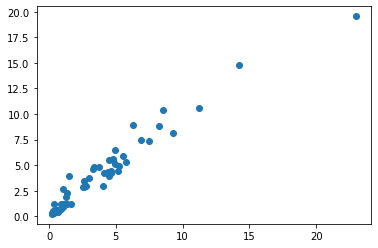

In [80]:
plt.scatter(Y_test,predictions)

In [ ]:
# Linear straight line indicates the correctness of the predictions. Similar to a QQ plot. 

In [85]:
# creating the pickle file for the model 
import pickle
file = open('random_forest_regression_model.pkl','wb')

# dump that information into the pickle file : 
pickle.dump(rf_random,file)